In [10]:
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzerimport matplotlib.pyplot as plt
import matplotlib.pyplot as plt
sid = SentimentIntensityAnalyzer()

In [123]:
import seaborn as sns

In [17]:
df = pd.read_csv('IMDB_Dataset.csv')
df.sample(10)

,review,sentiment
41850,David Lynch usually makes films that resemble ...,positive
45179,"Obviously influenced by the success of Pal's ""...",negative
49671,"The history of the FBI, as told from the point...",positive
1743,"""Hero and the Terror"" is a fairly dull thrille...",negative
35124,It is one of the best of Stephen Chow. I give ...,positive
46281,"This movie is more Lupin then most, especially...",positive
5092,"I know that to include everything in the book,...",positive
25435,First of all I thought it was naughty of them ...,negative
26838,and it doesn't help rohmer's case that a few y...,negative
11070,if you watch this at home on DVD or Bluray! be...,positive


In [130]:
d = df.sentiment.value_counts().to_dict()

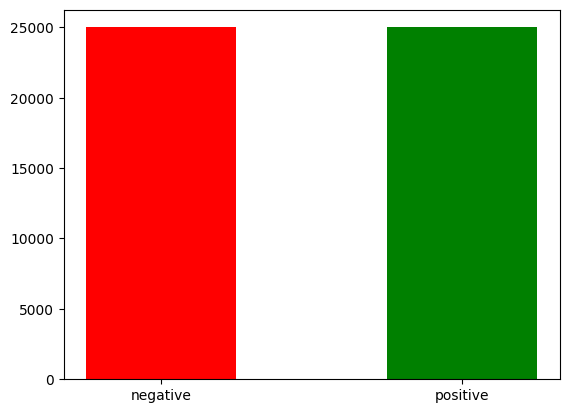

In [146]:
plt.bar('negative', d['negative'], width=0.5, color='red', )
plt.bar('positive', d['positive'], width=0.5, color='green')
plt.show()

In [19]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))
df.head()

,review,sentiment,scores
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.179, 'neu': 0.756, 'pos': 0.064, 'co..."
1,A wonderful little production. <br /><br />The...,positive,"{'neg': 0.052, 'neu': 0.773, 'pos': 0.176, 'co..."
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.114, 'neu': 0.688, 'pos': 0.198, 'co..."
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.125, 'neu': 0.816, 'pos': 0.059, 'co..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.05, 'neu': 0.806, 'pos': 0.144, 'com..."


In [20]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,review,sentiment,scores,compound
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.179, 'neu': 0.756, 'pos': 0.064, 'co...",-0.9916
1,A wonderful little production. <br /><br />The...,positive,"{'neg': 0.052, 'neu': 0.773, 'pos': 0.176, 'co...",0.9670
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.114, 'neu': 0.688, 'pos': 0.198, 'co...",0.9519
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.125, 'neu': 0.816, 'pos': 0.059, 'co...",-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.05, 'neu': 0.806, 'pos': 0.144, 'com...",0.9744


In [67]:
df['comp_score'] = df['compound'].apply(lambda c: 'positive' if c >=0.809 else 'negative')

df.head()

,review,sentiment,scores,compound,comp_score,Conf_Matrix
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.179, 'neu': 0.756, 'pos': 0.064, 'co...",-0.9916,negative,FN
1,A wonderful little production. <br /><br />The...,positive,"{'neg': 0.052, 'neu': 0.773, 'pos': 0.176, 'co...",0.9670,positive,TP
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.114, 'neu': 0.688, 'pos': 0.198, 'co...",0.9519,positive,TP
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.125, 'neu': 0.816, 'pos': 0.059, 'co...",-0.9213,negative,TN
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.05, 'neu': 0.806, 'pos': 0.144, 'com...",0.9744,positive,TP


In [147]:
df['comp_score'] = df['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')

df.head()

,review,sentiment,scores,compound,comp_score,Conf_Matrix
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.179, 'neu': 0.756, 'pos': 0.064, 'co...",-0.9916,negative,FN
1,A wonderful little production. <br /><br />The...,positive,"{'neg': 0.052, 'neu': 0.773, 'pos': 0.176, 'co...",0.9670,positive,FN
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.114, 'neu': 0.688, 'pos': 0.198, 'co...",0.9519,positive,FN
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.125, 'neu': 0.816, 'pos': 0.059, 'co...",-0.9213,negative,TN
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.05, 'neu': 0.806, 'pos': 0.144, 'com...",0.9744,positive,FN


In [148]:
def conf_matrix(x):
    if x['sentiment'] == 'positive' and x['comp_score'] == 'positive':
        return 'TP'
    elif x['sentiment'] == 'positive' and x['comp_score'] == 'negative':
        return 'FN'
    elif x['sentiment'] == 'negative' and x['comp_score'] == 'positive':
        return 'FP'
    elif x['sentiment'] == 'negative' and x['comp_score'] == 'negative':
        return 'TN'
    else:
        return 0

df['Conf_Matrix'] = df.apply(lambda x: conf_matrix(x), axis=1)

In [149]:
conf_vals = df.Conf_Matrix.value_counts().to_dict()
print(conf_vals)

accuracy = (conf_vals['TP'] + conf_vals['TN']) / (conf_vals['TP'] + conf_vals['TN'] + conf_vals['FP'] + conf_vals['FN'])
precision = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FP'])
recall = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FN'])
f1_score = 2*precision*recall / (precision + recall)
print('Accuracy: ', round(100 * accuracy, 2),'%',
      '\nPrecision: ', round(100 * precision, 2),'%',
      '\nRecall: ', round(100 * recall, 2),'%',
      '\nF1 Score: ', round(100 * f1_score, 2),'%')

{'TP': 21532, 'TN': 13253, 'FP': 11747, 'FN': 3468}
Accuracy:  69.57 % 
Precision:  64.7 % 
Recall:  86.13 % 
F1 Score:  73.89 %


In [150]:
def to_int(x):
    if x[1] == 'positive':
        return 1
    return 0

In [151]:
x = pd.DataFrame()
x['actual'] = df.apply(lambda x: to_int(x), axis=1)
x['predicted'] = df.apply(lambda x: to_int(x), axis=1)

In [153]:
cm = [[conf_vals['TN'], conf_vals['FP']],[conf_vals['FN'], conf_vals['TP']]]

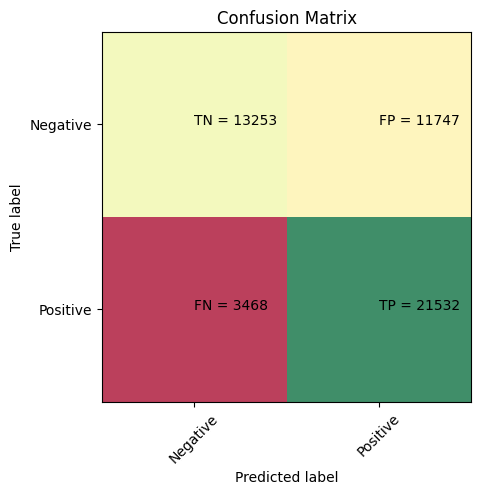

In [154]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.RdYlGn, alpha=0.75)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
# Write a review as one continuous string (multiple sentences are ok)
review = 'Is the movie good?'
# Obtain the sid scores for your review
# OUTPUT-
print(sid.polarity_scores(review))
# {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.5859}
review='The movie is good!'
# Obtain the sid scores for your review
print(sid.polarity_scores(review))
# OUTPUT-
# {'neg': 0.539, 'neu': 0.461, 'pos': 0.0, 'compound': -0.8849}

In [ ]:
import re
# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
    cleantext = raw_html.lower()
    cleantext = re.sub(CLEANR, '', raw_html)
    return cleantext

def occStr(ser):
    if '!!!!!' in ser:
        ser = str(ser).replace('!!!!!', '!!!')
    if '!!!!' in ser:
        ser = str(ser).replace('!!!!', '!!!')
    return ser

for i in df.itertuples():
    if '!!!!' in i[1] or '!!!!!' in i[1]:
        str_x = i[1]
        print(str_x)
        print(sid.polarity_scores(str_x))

        print('***')
        str_x = occStr(str_x)
        print(cleanhtml(str_x))
        print(sid.polarity_scores(cleanhtml(str_x)))
        print("*"*20)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentence = input('Enter your review:')
tokenized_sentence = nltk.word_tokenize(sentence)

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)                

print('Positive:',pos_word_list)        
print('Neutral:',neu_word_list)    
print('Negative:',neg_word_list) 
score = sid.polarity_scores(sentence)
print('\nScores:', score)

## Experiment

In [ ]:
print(sid.polarity_scores('was the movie good?'))


In [ ]:
exclamation = []

def occ(ser):
    update = False
    if '!!!!!' in ser['review']:
        ser['review'] = str(ser['review']).replace('!!!!!', '!!!')
        update = True
    if '!!!!' in ser['review']:
        ser['review'] = str(ser['review']).replace('!!!!', '!!!')
        update = True
    return ser, update
for index, row in df.iterrows():
    row, up = occ(row)
    exclamation.append(up)

## Improving Accuracy

In [158]:
def to_int(x):
    if x[1] == 'positive':
        return 1
    return 0

In [159]:
conf_vals

{'TP': 21532, 'TN': 13253, 'FP': 11747, 'FN': 3468}

In [160]:
cm = [[conf_vals['TN'], conf_vals['FP']],[conf_vals['FN'], conf_vals['TP']]]

In [ ]:
clns = cleanhtml(conStr)

In [169]:
x = np.linspace(-1,1,1000)
y = []
for threshold in x:
    df['comp_score'] = df['compound'].apply(lambda c: 'positive' if c >=threshold else 'negative')
    df['Conf_Matrix'] = df.apply(lambda x: conf_matrix(x), axis=1)
    conf_vals = df.Conf_Matrix.value_counts().to_dict()
    if 'TP' not in conf_vals:
        conf_vals['TP'] = 0
    if 'FP' not in conf_vals:
        conf_vals['FP'] = 0
    if 'TN' not in conf_vals:
        conf_vals['TN'] = 0
    if 'FN' not in conf_vals:
        conf_vals['FN'] = 0
    accuracy = (conf_vals['TP'] + conf_vals['TN']) / (conf_vals['TP'] + conf_vals['TN'] + conf_vals['FP'] + conf_vals['FN'])
    y.append(accuracy)

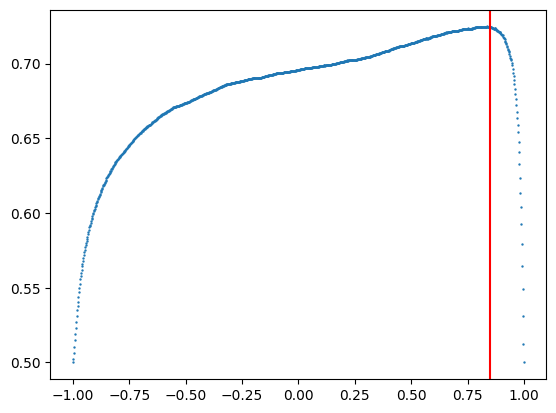

In [170]:
plt.scatter(x, y, s=0.5)
plt.axvline(0.85, c='r')
plt.show()

In [161]:
df['comp_score'] = df['compound'].apply(lambda c: 'positive' if c >=0.809 else 'negative')

df.head()

,review,sentiment,scores,compound,comp_score,Conf_Matrix
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.179, 'neu': 0.756, 'pos': 0.064, 'co...",-0.9916,negative,FN
1,A wonderful little production. <br /><br />The...,positive,"{'neg': 0.052, 'neu': 0.773, 'pos': 0.176, 'co...",0.9670,positive,TP
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.114, 'neu': 0.688, 'pos': 0.198, 'co...",0.9519,positive,TP
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.125, 'neu': 0.816, 'pos': 0.059, 'co...",-0.9213,negative,TN
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.05, 'neu': 0.806, 'pos': 0.144, 'com...",0.9744,positive,TP


In [162]:
def conf_matrix(x):
    if x['sentiment'] == 'positive' and x['comp_score'] == 'positive':
        return 'TP'
    elif x['sentiment'] == 'positive' and x['comp_score'] == 'negative':
        return 'FN'
    elif x['sentiment'] == 'negative' and x['comp_score'] == 'positive':
        return 'FP'
    elif x['sentiment'] == 'negative' and x['comp_score'] == 'negative':
        return 'TN'
    else:
        return 0

df['Conf_Matrix'] = df.apply(lambda x: conf_matrix(x), axis=1)

In [163]:
conf_vals = df.Conf_Matrix.value_counts().to_dict()
print(conf_vals)

accuracy = (conf_vals['TP'] + conf_vals['TN']) / (conf_vals['TP'] + conf_vals['TN'] + conf_vals['FP'] + conf_vals['FN'])
precision = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FP'])
recall = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FN'])
f1_score = 2*precision*recall / (precision + recall)
print('Accuracy: ', round(100 * accuracy, 2),'%',
      '\nPrecision: ', round(100 * precision, 2),'%',
      '\nRecall: ', round(100 * recall, 2),'%',
      '\nF1 Score: ', round(100 * f1_score, 2),'%')

{'TP': 18513, 'TN': 17706, 'FP': 7294, 'FN': 6487}
Accuracy:  72.44 % 
Precision:  71.74 % 
Recall:  74.05 % 
F1 Score:  72.88 %


In [164]:
def to_int(x):
    if x[1] == 'positive':
        return 1
    return 0

In [165]:
x = pd.DataFrame()
x['actual'] = df.apply(lambda x: to_int(x), axis=1)
x['predicted'] = df.apply(lambda x: to_int(x), axis=1)

In [166]:
cm = [[conf_vals['TN'], conf_vals['FP']],[conf_vals['FN'], conf_vals['TP']]]

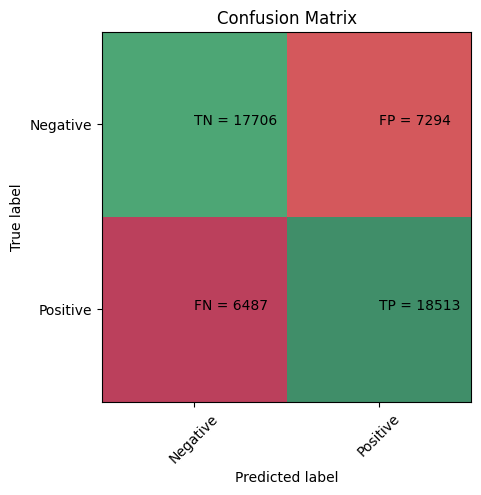

In [167]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.RdYlGn, alpha=0.75)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Demo

In [174]:
sid.polarity_scores(text = 'The movie was great')

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}